In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_excel('Downloads/Copy of NIST Data Entry_IncludingTest08.xlsx' , skiprows=[1,2]) 
               # header=None)
# Shorten Column Headers
names= {
    "Who is recording this data? (Who are you?)" : "Recorder",
    "Tool flank wear on chamfer - 1st (in inches)" : "Tool Wear 1st",
    "Tool flank wear on chamfer - 2nd (in inches)" : "Tool Wear 2nd",
    "Tool flank wear on chamfer - 3rd (in inches)" : "Tool Wear 3rd",
    "Tool flank wear on chamfer - 4th (in inches)" : "Tool Wear 4th",
    "Surface finish - face (in microinches)" : "Surface Finish",
    "What time is it?" : "Recorded Time", 
    "What are you doing?\n(Please be descriptive.)": "Action",
    "What is the workpiece number?" : "Workpiece Number",
    "What is the layer number?" : "Layer Number",
    "What is the tool number?" : "Tool Number",
    "If the test was paused, when?\n(Skip this question if the machine was not stopped during the test.)" : "Pause Time",
    "On a scale from 1-5, what was the process condition?": "Process Condition",
    "On a scale from 1-5, what is the tool's condition?\n(Skip if in-process observation)" : "Tool Condition",
    "Describe the cut.\n(Be descriptive; if applicable, include sounds, quality, and such that were out of the ordinary)" : "Cut Description",
    "How long do you expect this tool to last before it reaches the end of life (in number of layers)?\n(You may skip this question for in-process observations.)" : "Expected Lifetime"
}
df.rename(columns=names, inplace=True)

In [63]:
df.head()

,Timestamp,Recorder,Tool Wear 1st,Tool Wear 2nd,Tool Wear 3rd,Tool Wear 4th,Surface Finish,Recorded Time,Action,Workpiece Number,Layer Number,Tool Number,What is the test status?,Pause Time,Process Condition,Tool Condition,Cut Description,Expected Lifetime,General notes
0,2022-08-15 13:53:15.667,Machinist,0.0014,0.0020,0.0016,0.0023,29.0,12:57:00,preparing to start 2nd layer,1.0,2.0,2.0,New layer,NaN,1 - Working as normal,1 - New or very light wear,sounds perfectly normal,7.0,NaN
1,2022-08-15 13:54:46.375,Non-Machinist,NaN,NaN,NaN,NaN,NaN,12:58:00,I am listening to the machine and tool as it i...,1.0,2.0,2.0,New layer,NaN,1 - Working as normal,1 - New or very light wear,The cut itself seemed very normal. There were ...,13.0,NaN
2,2022-08-16 09:28:06.158,Non-Machinist,NaN,NaN,NaN,NaN,NaN,09:24:00,Listening to the start of layer 3 of tool 2,1.0,3.0,2.0,New layer,NaN,1 - Working as normal,NaN,"This sounds very smooth, no abnormalities.",NaN,NaN
3,2022-08-16 09:28:21.147,Machinist,0.0033,0.0027,0.0021,0.0028,29.0,09:14:00,"preparing for layer 3, starting das",1.0,3.0,2.0,New layer,NaN,1 - Working as normal,1 - New or very light wear,sound very smooth,7.0,NaN
4,2022-08-16 09:54:23.848,Machinist,NaN,NaN,NaN,NaN,NaN,09:53:00,observing,1.0,3.0,2.0,Intermediary,NaN,1 - Working as normal,NaN,smooth and normal,7.0,NaN


In [64]:
df.describe()

,Tool Wear 1st,Tool Wear 2nd,Tool Wear 3rd,Tool Wear 4th,Surface Finish,Workpiece Number,Layer Number,Tool Number,Expected Lifetime
count,52.000000,52.000000,52.000000,52.000000,51.000000,303.000000,303.000000,303.000000,180.000000
mean,0.004008,0.004429,0.003858,0.004581,37.627451,5.963696,4.310231,4.924092,7.194444
std,0.001717,0.001835,0.001538,0.001921,10.250777,2.627290,2.202376,1.933715,2.171674
min,0.001400,0.002000,0.001600,0.001800,23.000000,1.000000,1.000000,2.000000,0.000000
25%,0.002675,0.002900,0.002575,0.003000,29.000000,4.000000,3.000000,3.000000,7.000000
50%,0.003650,0.004400,0.003550,0.004200,35.000000,6.000000,4.000000,5.000000,8.000000
75%,0.005200,0.005700,0.004800,0.006250,44.500000,8.000000,6.000000,6.000000,8.000000
max,0.007700,0.008600,0.007700,0.008800,68.000000,10.000000,9.000000,8.000000,13.000000


In [65]:
df.dtypes

Timestamp                   datetime64[ns]
Recorder                            object
Tool Wear 1st                      float64
Tool Wear 2nd                      float64
Tool Wear 3rd                      float64
Tool Wear 4th                      float64
Surface Finish                     float64
Recorded Time                       object
Action                              object
Workpiece Number                   float64
Layer Number                       float64
Tool Number                        float64
What is the test status?            object
Pause Time                          object
Process Condition                   object
Tool Condition                      object
Cut Description                     object
Expected Lifetime                  float64
General notes                       object
dtype: object

In [66]:
df['Process Condition'].unique()

array(['1 - Working as normal', '2 - Minor unusual behavior', nan,
       '3 - Notable unusual occurrences',
       '4 - Significant unusual behavior'], dtype=object)

In [67]:
df['Tool Condition'].unique()

array(['1 - New or very light wear', nan,
       '2 - Small amount of flank wear and/or minor chipping',
       '5 - Failed (broken or end-of-life) or imminent failure',
       '3 - Average flank wear and/or notable chipping'], dtype=object)

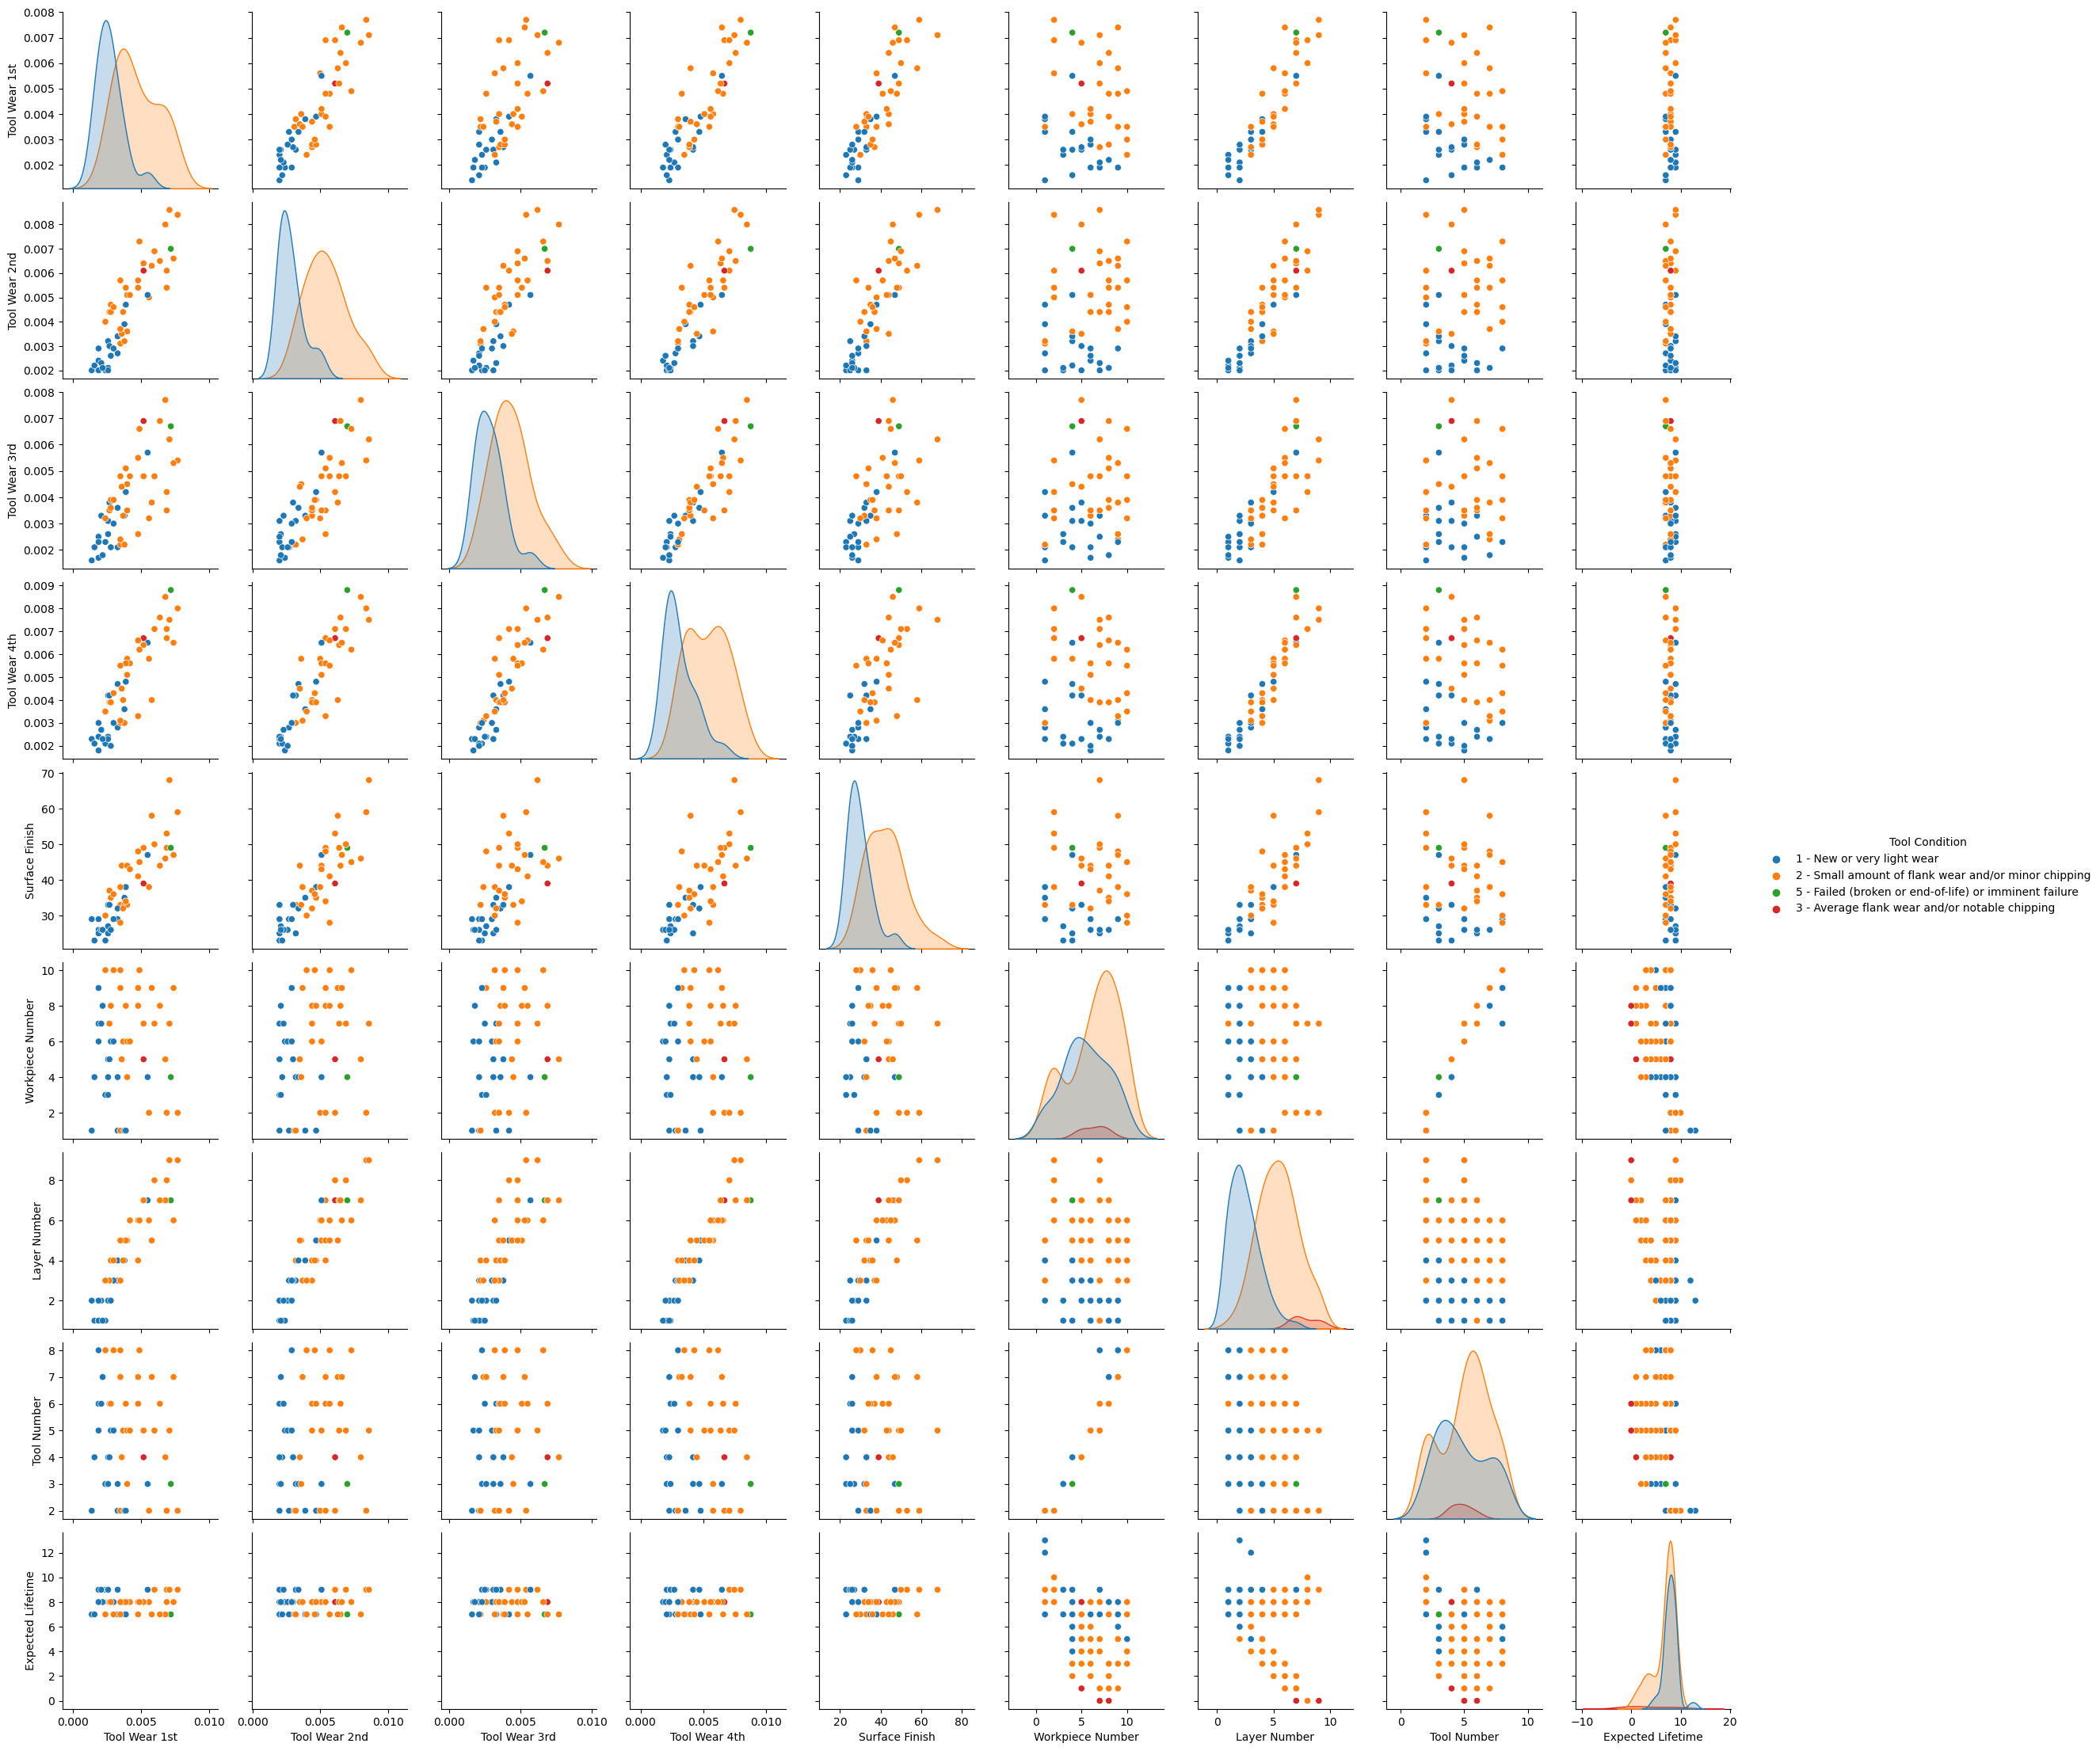

In [68]:
sns.pairplot(df, hue = 'Tool Condition')

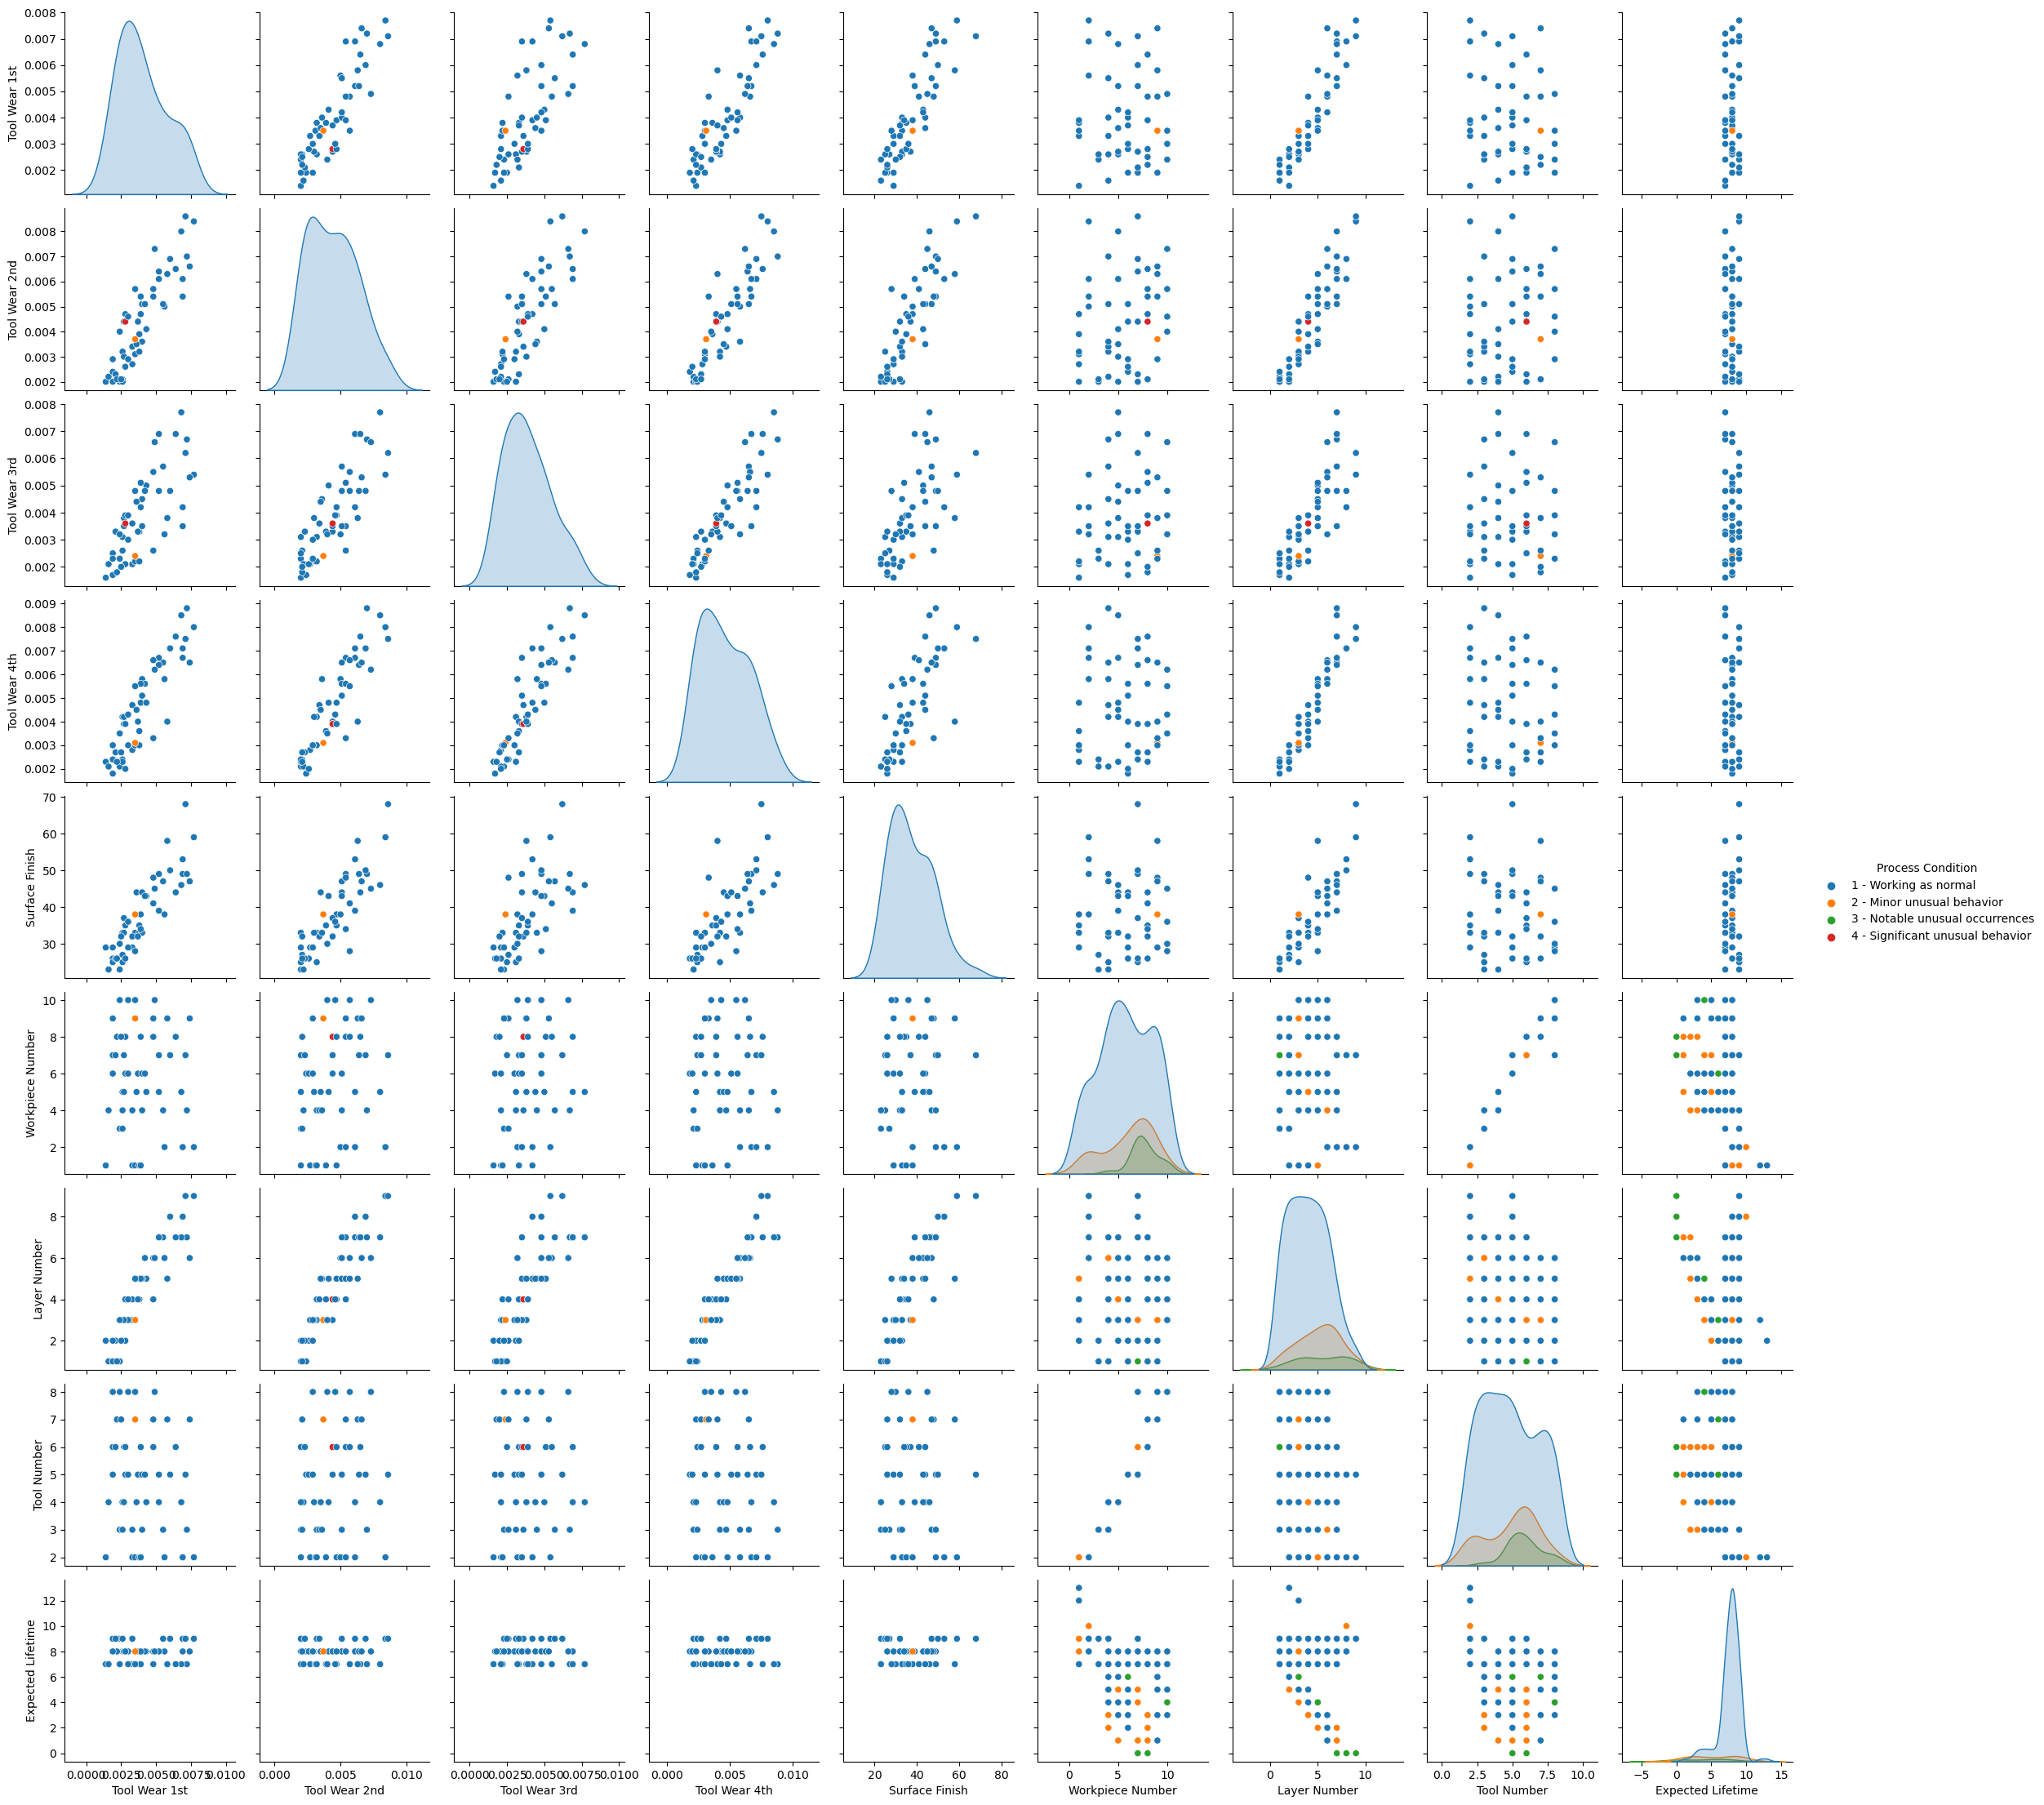

In [80]:
sns.pairplot(df, hue = 'Process Condition')

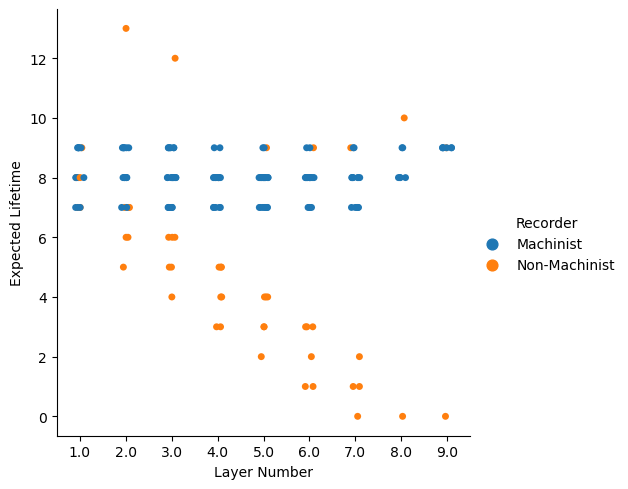

In [84]:
sns.catplot(x='Layer Number',y='Expected Lifetime', data=df, hue='Recorder')

<AxesSubplot:xlabel='What is the test status?', ylabel='Expected Lifetime'>

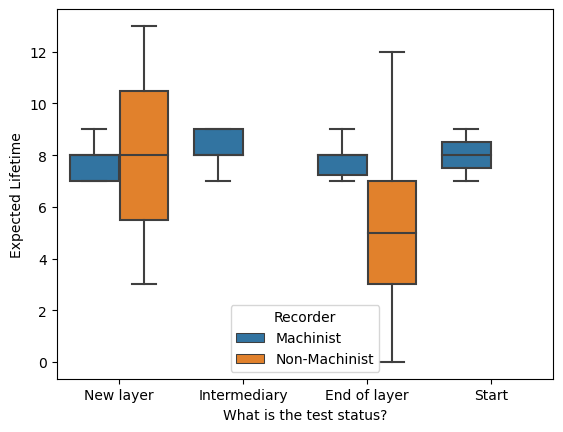

In [85]:
sns.boxplot(x='What is the test status?',y='Expected Lifetime', data=df, hue='Recorder')